# **Preparing Data**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"varrasqi","key":"602ab18ec00027124956717645beab08"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d 'praveengovi/emotions-dataset-for-nlp'

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 46.1MB/s]


In [ ]:
import zipfile

dataset_zip = zipfile.ZipFile('emotions-dataset-for-nlp.zip')

dataset_zip.extractall()

dataset_zip.close()

In [ ]:
import re
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Reading Data**

In [ ]:
train = pd.read_csv('train.txt')
tes = pd.read_csv('test.txt')
val = pd.read_csv('val.txt')

train.head()

,i didnt feel humiliated;sadness
0,i can go from feeling so hopeless to so damned...
1,im grabbing a minute to post i feel greedy wro...
2,i am ever feeling nostalgic about the fireplac...
3,i am feeling grouchy;anger
4,ive been feeling a little burdened lately wasn...


In [ ]:
train = pd.read_csv('train.txt', sep=';', header=None, names=['text', 'label'])
test = pd.read_csv('test.txt', sep=';', header=None, names=['text', 'label'])
val = pd.read_csv('val.txt', sep=';', header=None, names=['text', 'label'])

train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# **Get Info From Dataset**

In [ ]:
print("Train Shape", train.shape)
print("Test Shape", test.shape)
print("Val Shape", val.shape)

Train Shape (16000, 2)
Test Shape (2000, 2)
Val Shape (2000, 2)


In [ ]:
print("Train")
train.isnull().sum()

Train


text     0
label    0
dtype: int64

In [ ]:
print("Test")
test.isnull().sum()

Test


text     0
label    0
dtype: int64

In [ ]:
print("Val")
val.isnull().sum()

Val


text     0
label    0
dtype: int64

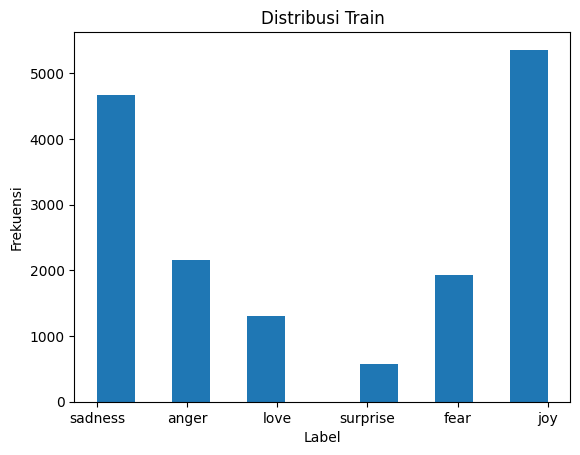

In [ ]:
plt.hist(train['label'], bins=12)
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.title('Distribusi Train')
plt.show()

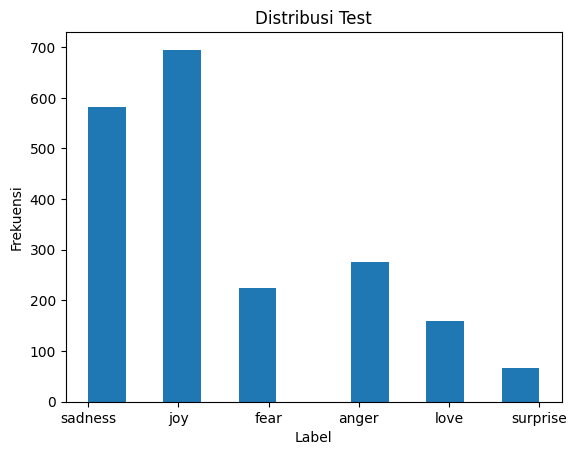

In [ ]:
plt.hist(test['label'], bins=12)
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.title('Distribusi Test')
plt.show()

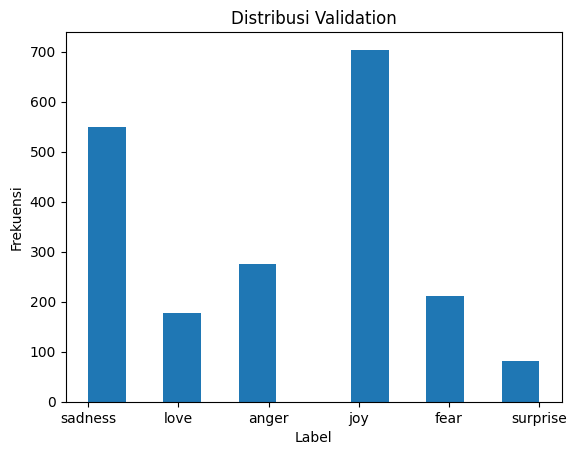

In [ ]:
plt.hist(val['label'], bins=12)
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.title('Distribusi Validation')
plt.show()

In [ ]:
sample_train = train['text'][20]
sample_test = test['text'][20]
sample_val = val['text'][20]

In [ ]:
print("train sample txt:", sample_train)
print("test sample txt:", sample_test)
print("val sample txt:", sample_val)

train sample txt: i feel irritated and rejected without anyone doing anything or saying anything
test sample txt: im not sure the feeling of loss will ever go away but it may dull to a sweet feeling of nostalgia at what i shared in this life with my dad and the luck i had to have a dad for years
val sample txt: i just know to begin with i am going to feel shy about it


# **Data Cleaning**

**1. Lowercase**

**2. Removing number**

**3. Removing Punctuation**

**4. Remove Stopwords**

**5. Lemmatize**


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.7 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def lower_text(text):
    return text.lower()

def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'', text)

def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        text = text.replace(p, f' {p} ')
    return text

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    return text

def lemmatize_lower(text):
    stop_words = [word for word in text.split() if word not in (stopwords)]
    text = ' '.join([lemmatizer.lemmatize(contractions.fix(lower_text(text))) for txt in text.split() if txt not in stop_words])
    return text

In [ ]:
def clean_text(text):
    text = remove_number(text)
    text = remove_punct(text)
    text = lemmatize_lower(text)
    text = remove_stopwords(text)

    return text

In [ ]:
train.head(10)

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [ ]:
train["clean_text"] = train["text"].apply(clean_text)
test["clean_text"] = test["text"].apply(clean_text)
val["clean_text"] = val["text"].apply(clean_text)

In [ ]:
train.head(10)

,text,label,clean_text
0,i didnt feel humiliated,sadness,feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post feel greedy wrong grabbin...
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,feeling little burdened lately sure feeling li...
6,ive been taking or milligrams or times recomme...,surprise,taking milligrams times recommended amount fal...
7,i feel as confused about life as a teenager or...,fear,feel confused life teenager jaded year old man...
8,i have been with petronas for years i feel tha...,joy,petronas years feel petronas performed well ma...
9,i feel romantic too,love,feel romantic feel romantic


# **Convert Label to Num**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
train["encoded_label"] = encoder.fit_transform(train["label"])
test["encoded_label"] = encoder.transform(test["label"])
val["encoded_label"] = encoder.transform(val["label"])

X_train = train['clean_text']
X_test = val['clean_text']
y_train = train['encoded_label']
y_test = val['encoded_label']

In [ ]:
train.head(10)

,text,label,clean_text,encoded_label
0,i didnt feel humiliated,sadness,feel humiliated,4
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,4
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post feel greedy wrong grabbin...,0
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,3
4,i am feeling grouchy,anger,feeling grouchy feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,sadness,feeling little burdened lately sure feeling li...,4
6,ive been taking or milligrams or times recomme...,surprise,taking milligrams times recommended amount fal...,5
7,i feel as confused about life as a teenager or...,fear,feel confused life teenager jaded year old man...,1
8,i have been with petronas for years i feel tha...,joy,petronas years feel petronas performed well ma...,2
9,i feel romantic too,love,feel romantic feel romantic,3


# **Tokenization**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

In [ ]:
tokenizer = Tokenizer(oov_token='')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(test['clean_text'])

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

14977


In [ ]:
X_train = pad_sequences(X_train, padding='post', maxlen=128)
X_test = pad_sequences(X_test, padding='post', maxlen=128)
X_val = pad_sequences(X_val, padding='post', maxlen=128)

# **One Hot Encoding**

In [ ]:
 dmy_y_train = to_categorical(y_train)
 dmy_y_test = to_categorical(y_test)

# **Model Development**

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Embedding(vocab_size, 64, input_length=128),
    Dropout(0.4),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(256)),
    Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 64)           958528    
                                                                 
 dropout (Dropout)           (None, 128, 64)           0         
                                                                 
 bidirectional (Bidirection  (None, 128, 256)          197632    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               1050624   
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 3078      
                                                                 
Total params: 2209862 (8.43 MB)
Trainable params: 220986

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.85):
      print("\nAccuracy above 90%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, dmy_y_train,
                    epochs=200,
                    verbose=1,
                    validation_data=(X_test, dmy_y_test),
                    batch_size=128,
                    callbacks = [callbacks])

Epoch 1/200
125/125 [==============================] - 452s 4s/step - loss: 1.2231 - accuracy: 0.4942 - val_loss: 0.7518 - val_accuracy: 0.7315
Epoch 2/200
125/125 [==============================] - 436s 3s/step - loss: 0.4653 - accuracy: 0.8369 - val_loss: 0.5266 - val_accuracy: 0.8270
Epoch 3/200
125/125 [==============================] - 434s 3s/step - loss: 0.2642 - accuracy: 0.9134 - val_loss: 0.4886 - val_accuracy: 0.8490
Epoch 4/200
125/125 [==============================] - ETA: 0s - loss: 0.1737 - accuracy: 0.9419
Accuracy above 90%, finish training!
125/125 [==============================] - 441s 4s/step - loss: 0.1737 - accuracy: 0.9419 - val_loss: 0.5324 - val_accuracy: 0.8515


# **Save Model**

In [ ]:
import pathlib
export_dir = 'saved_model/LSTM'
tf.saved_model.save(model, export_dir)

# **Plot Training**

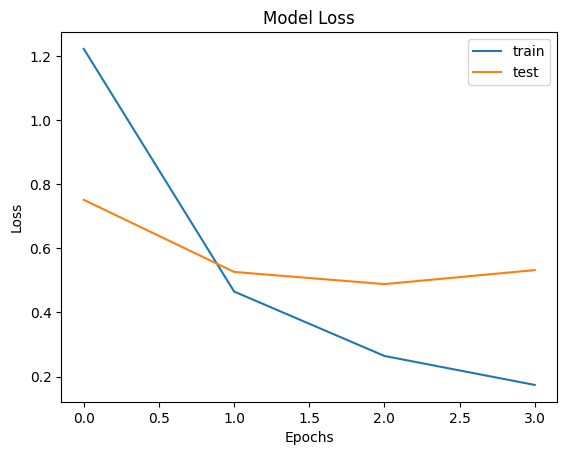

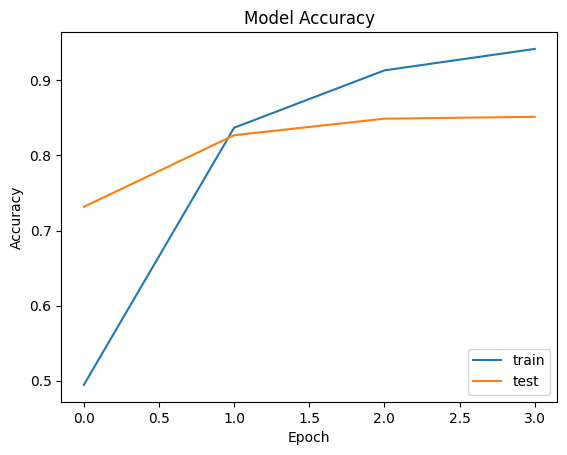

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
predict = model.predict(X_val)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

63/63 [==============================] - 26s 391ms/step


array([4, 4, 4, ..., 2, 2, 1])

# **Evaluation**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print("\nClassification Report:\n",classification_report(test["encoded_label"], predict_class, target_names =["anger", "fear", "joy", "love", "sadness", "surprise"]))


Classification Report:
               precision    recall  f1-score   support

       anger       0.86      0.76      0.81       275
        fear       0.85      0.74      0.79       224
         joy       0.86      0.90      0.88       695
        love       0.69      0.73      0.71       159
     sadness       0.87      0.88      0.88       581
    surprise       0.61      0.74      0.67        66

    accuracy                           0.84      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.84      0.84      0.84      2000

